# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографиями в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив их как файл (`pdf`/`png`/`jpg`) боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов


In [1]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).


*Замечания.* 
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. **Прочитайте требования к формату решения в правилах сдачи задания.**

## Решение 1 пункта
В методе наименьших квадратов минимизируем $F(\theta) = \| Y - X\theta \|^2$. \
$F(\theta)=\begin{pmatrix}
    x_1\theta_t - y_1 \\
    \vdots \\
    x_n\theta_t - y_n \\
\end{pmatrix}^2 \rightarrow min_{\theta \in R}$\
$F(\theta)=(Y - \theta X) ^ T(Y - \theta X) = Y^TY - 2X ^ TY\theta + 2\theta^2X^TX$\
$grad(F(\theta)) = -2X^TY + 2\theta X^TX = 0 \mapsto$
$\widehat{\theta} = (X^TX)^{-1}X^TY$. \
В нашей задаче $X = (x_1, x_2, ..., x_n)^T$ => $X^TX = \sum\limits_{i = 1}^n(x_i)^2$ => $(X^TX)^{-1} = \frac{1}{\sum\limits_{i = 1}^n(x_i)^2}$, 
$X^TY = \sum\limits_{i = 1}^n x_iy_i$ => $$\widehat{\theta} = \frac{\sum\limits_{i = 1}^n x_iy_i}{\sum\limits_{i = 1}^n(x_i)^2}\newline$$

## Решение 2 пункта
f(x) - функция для минимизации.\
$x_{t+1} = x_t - \eta * \nabla{f(x_t)}$ - функция минимизации\
Изначально $\theta_0 \in R^d$ возьмем произвольным,  $X = (x_1, x_2, ..., x_n)^T$\
Для функции $F(\theta) = \| Y - X\theta \|^2$ мы получили градиент $\nabla F(\theta) = -2X^TY + 2X^TX\theta$, тогда распишем равенство\
$$\theta_{t+1} = \theta_t - \eta * (x_1, ..., x_n) = \theta_t - \eta * \sum\limits_{i = 1}^nx_i(x_i\theta_t - y_i)$$  Дальше делаем итеративно.\
Выберем батч из $k$ элементов $I = \{i_1, ..., i_k\}$, где $i_j \in U\{1,2,...,n\}$ Тогда шаг SGD определяется по формуле: $$\theta_{t+1} = \theta_t - \eta * \frac{n}{k} \sum\limits_{i \in I}x_i(x_i\theta_t - y_i)$$

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

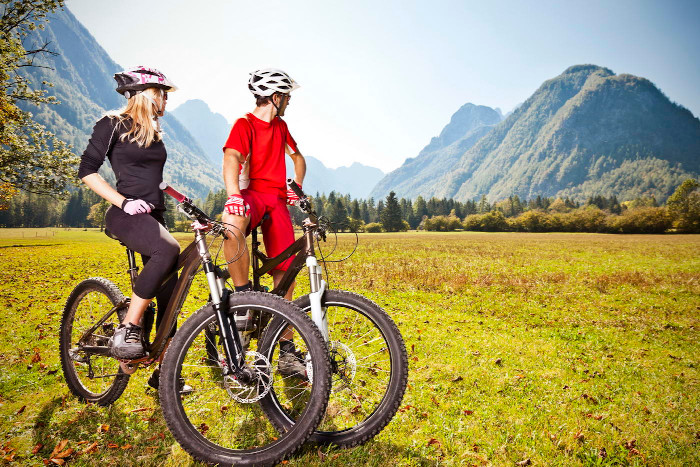

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [4]:
data = pd.read_csv("day.csv")

In [5]:
data = data[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
cat_features = ['season', 'mnth', 'holiday', 'workingday', 'weekday', 'weathersit']
num_features = ['temp', 'atemp', 'hum', 'windspeed']
target = 'cnt'

In [6]:
print(list(data.isna().sum())) #нет пустых ячеек в таблице
ds_train, ds_test = train_test_split(data, test_size=0.2)
ds_train.shape, ds_test.shape

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


((584, 11), (147, 11))

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

Давайте сделаем визуальный анализ сколько обычно арендуют велосипедов.

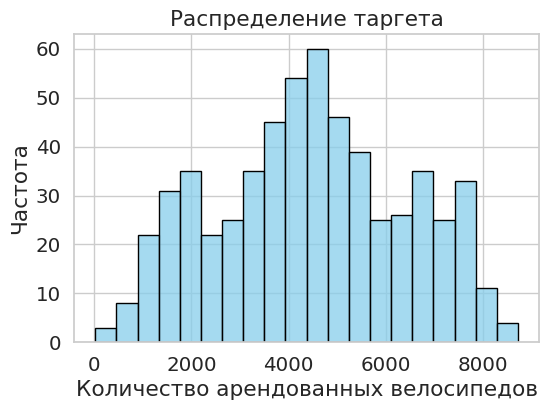

In [7]:
plt.figure(figsize=(6, 4))
sns.histplot(ds_train[target], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение таргета')
plt.xlabel('Количество арендованных велосипедов')
plt.ylabel('Частота')
plt.grid(True)

Давайте рассмотрим как категориальные признаки между собой соотносятся

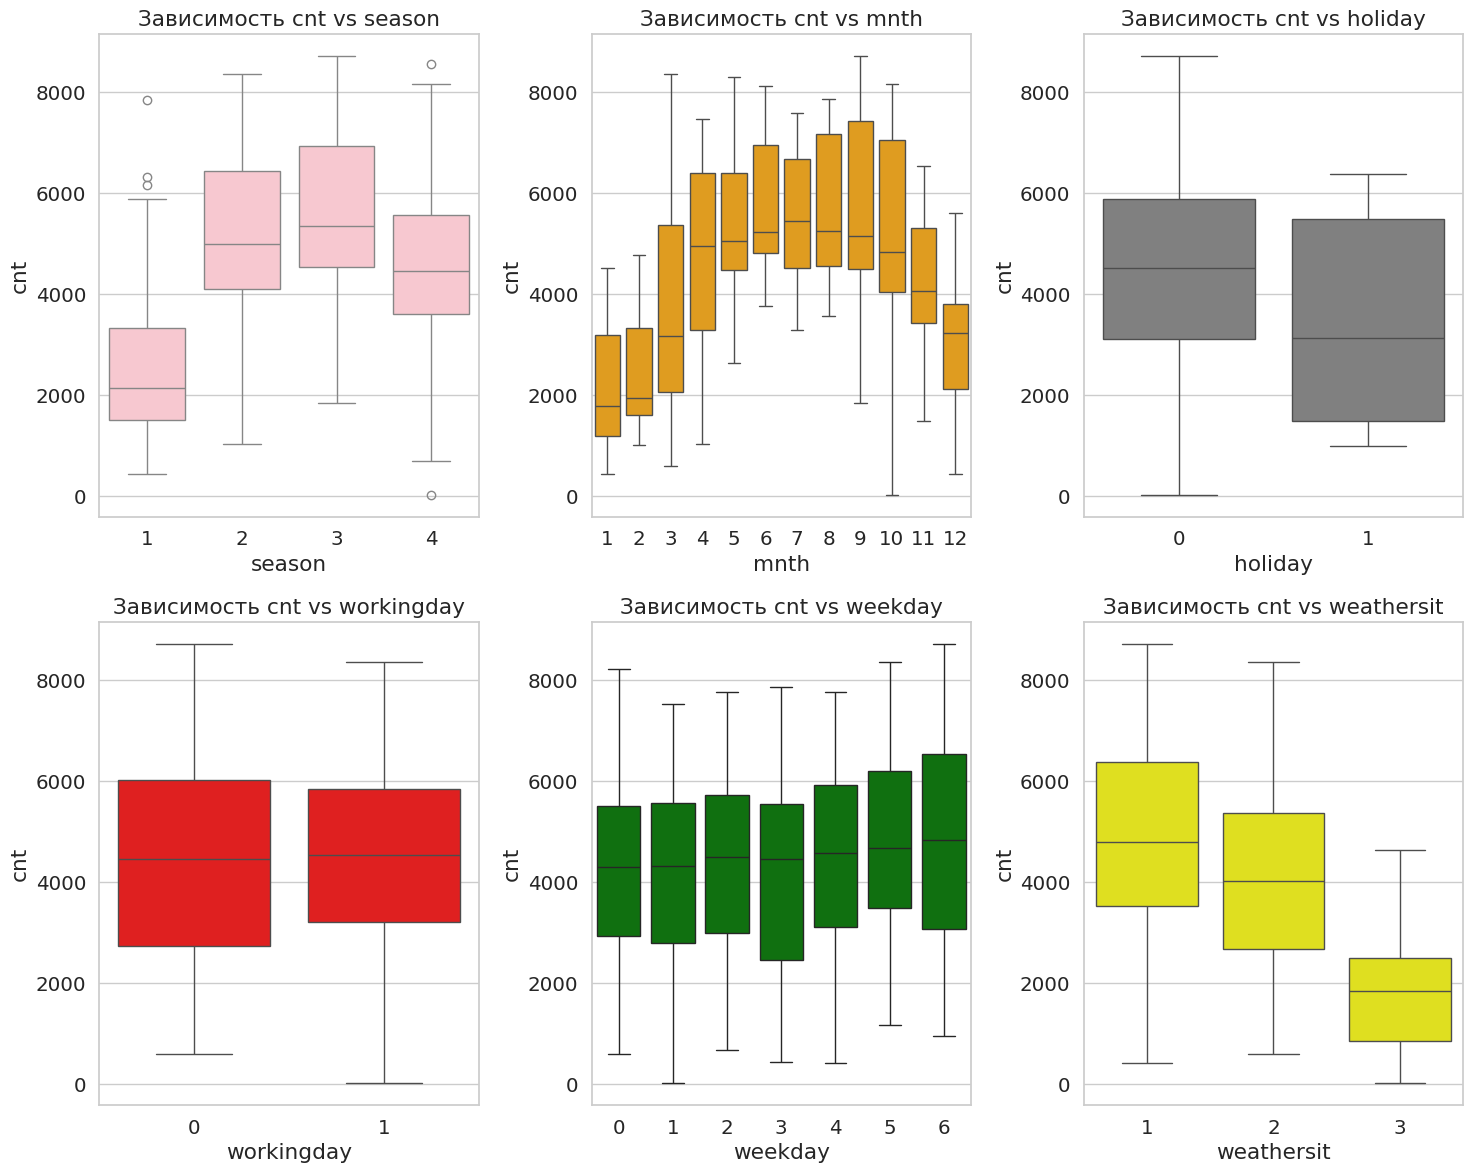

In [8]:
fig, axe = plt.subplots(2, 3, figsize=(15, 12))
colors = ["pink", "orange", "grey", "red", "green", "yellow"]
for i, feature in enumerate(cat_features):
    r = i // 3
    c = i % 3
    sns.boxplot(data = ds_train, x = feature, y = target, ax=axe[r][c], color = colors[i])
    axe[r][c].set_title(f'Зависимость {target} vs {feature}')

plt.tight_layout()
plt.show()

Исходя из графиков выше, которые отражают значение величины от ее количества можно сделать вывод, что weekday, workingday и holiday незначительные признаки и количество от них несильно изменится.  Month и Season зависят очень сильно, также видна разница у weathersit, возьмем все эти фичи и построим графики.

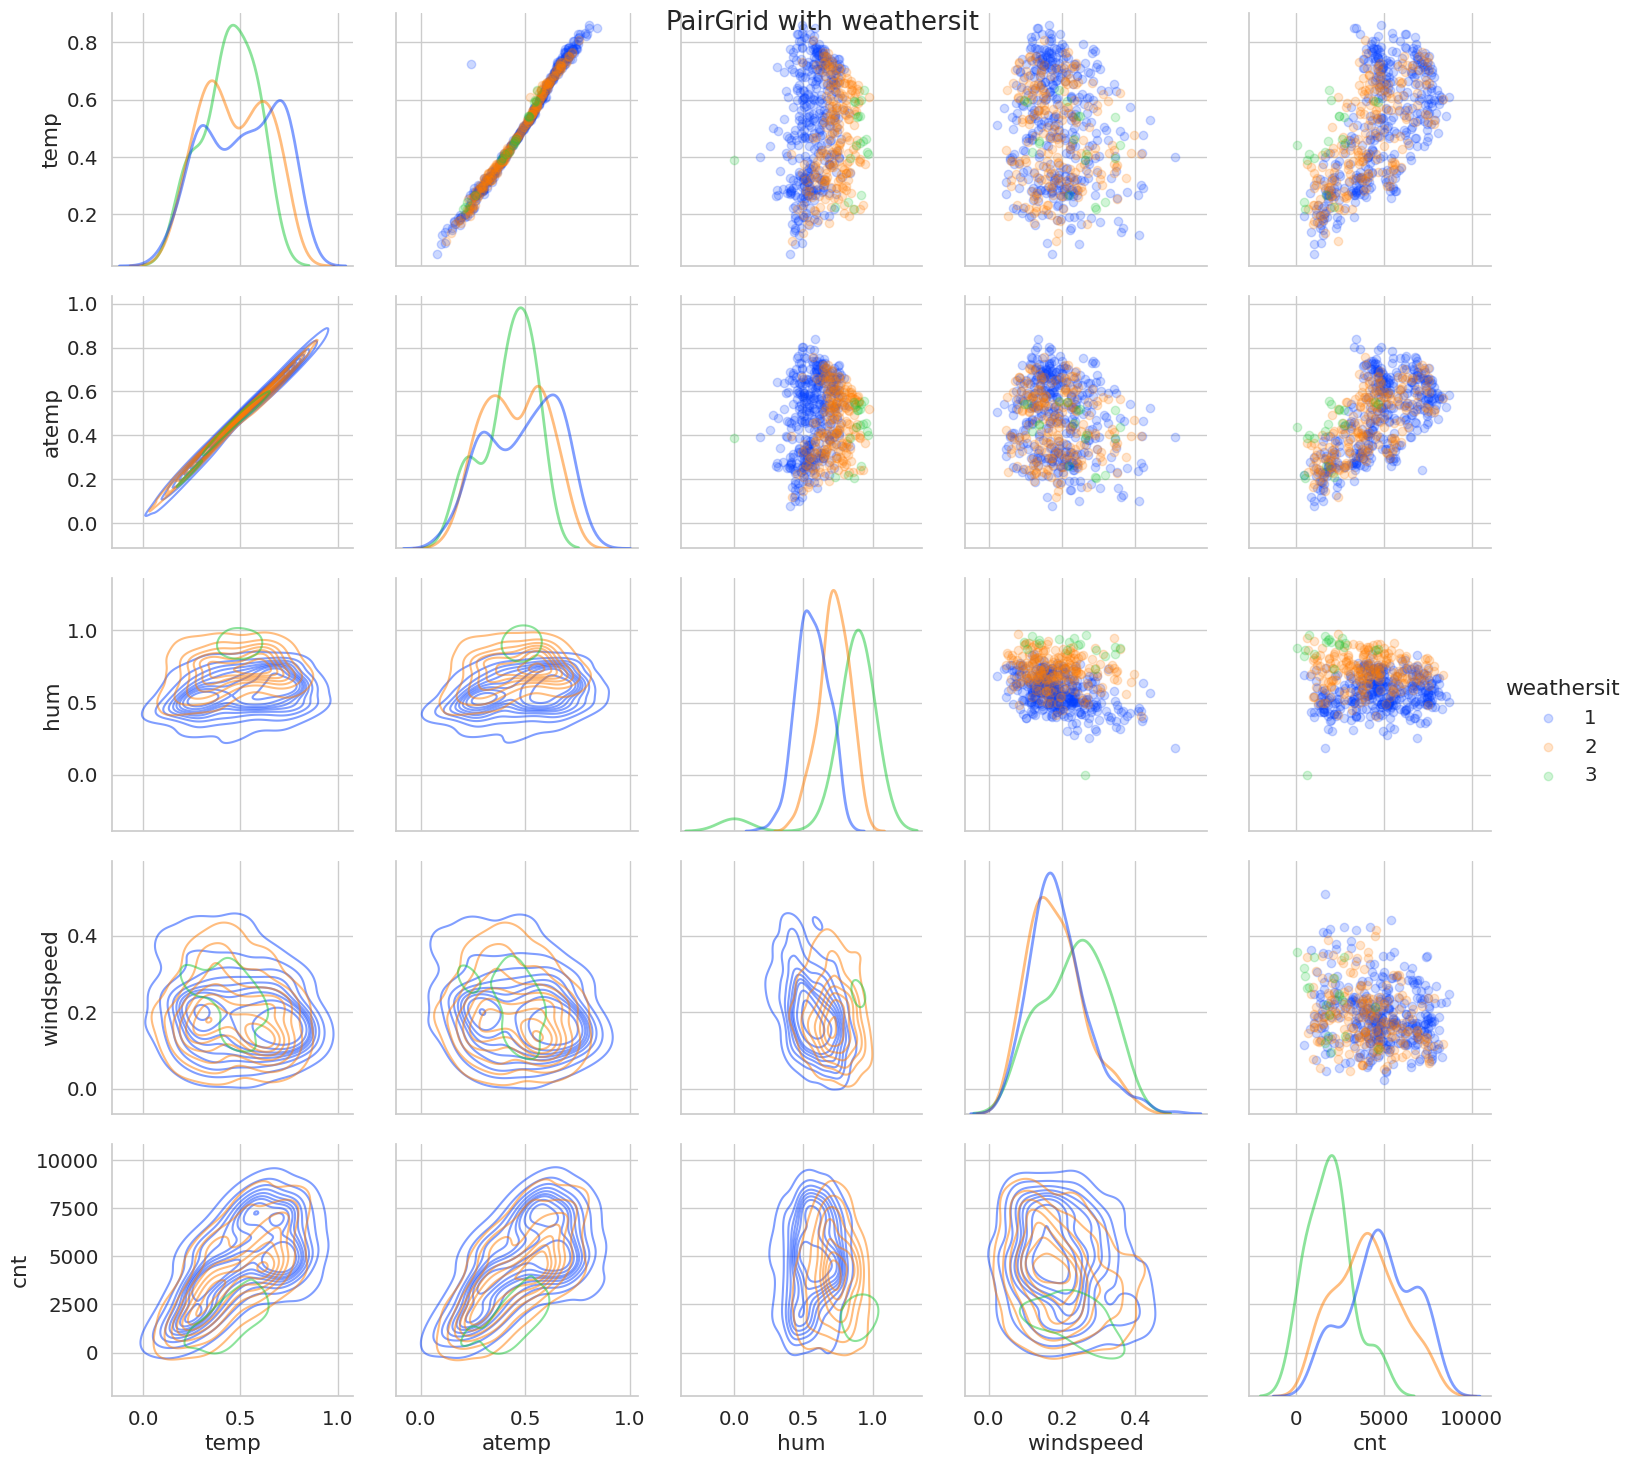

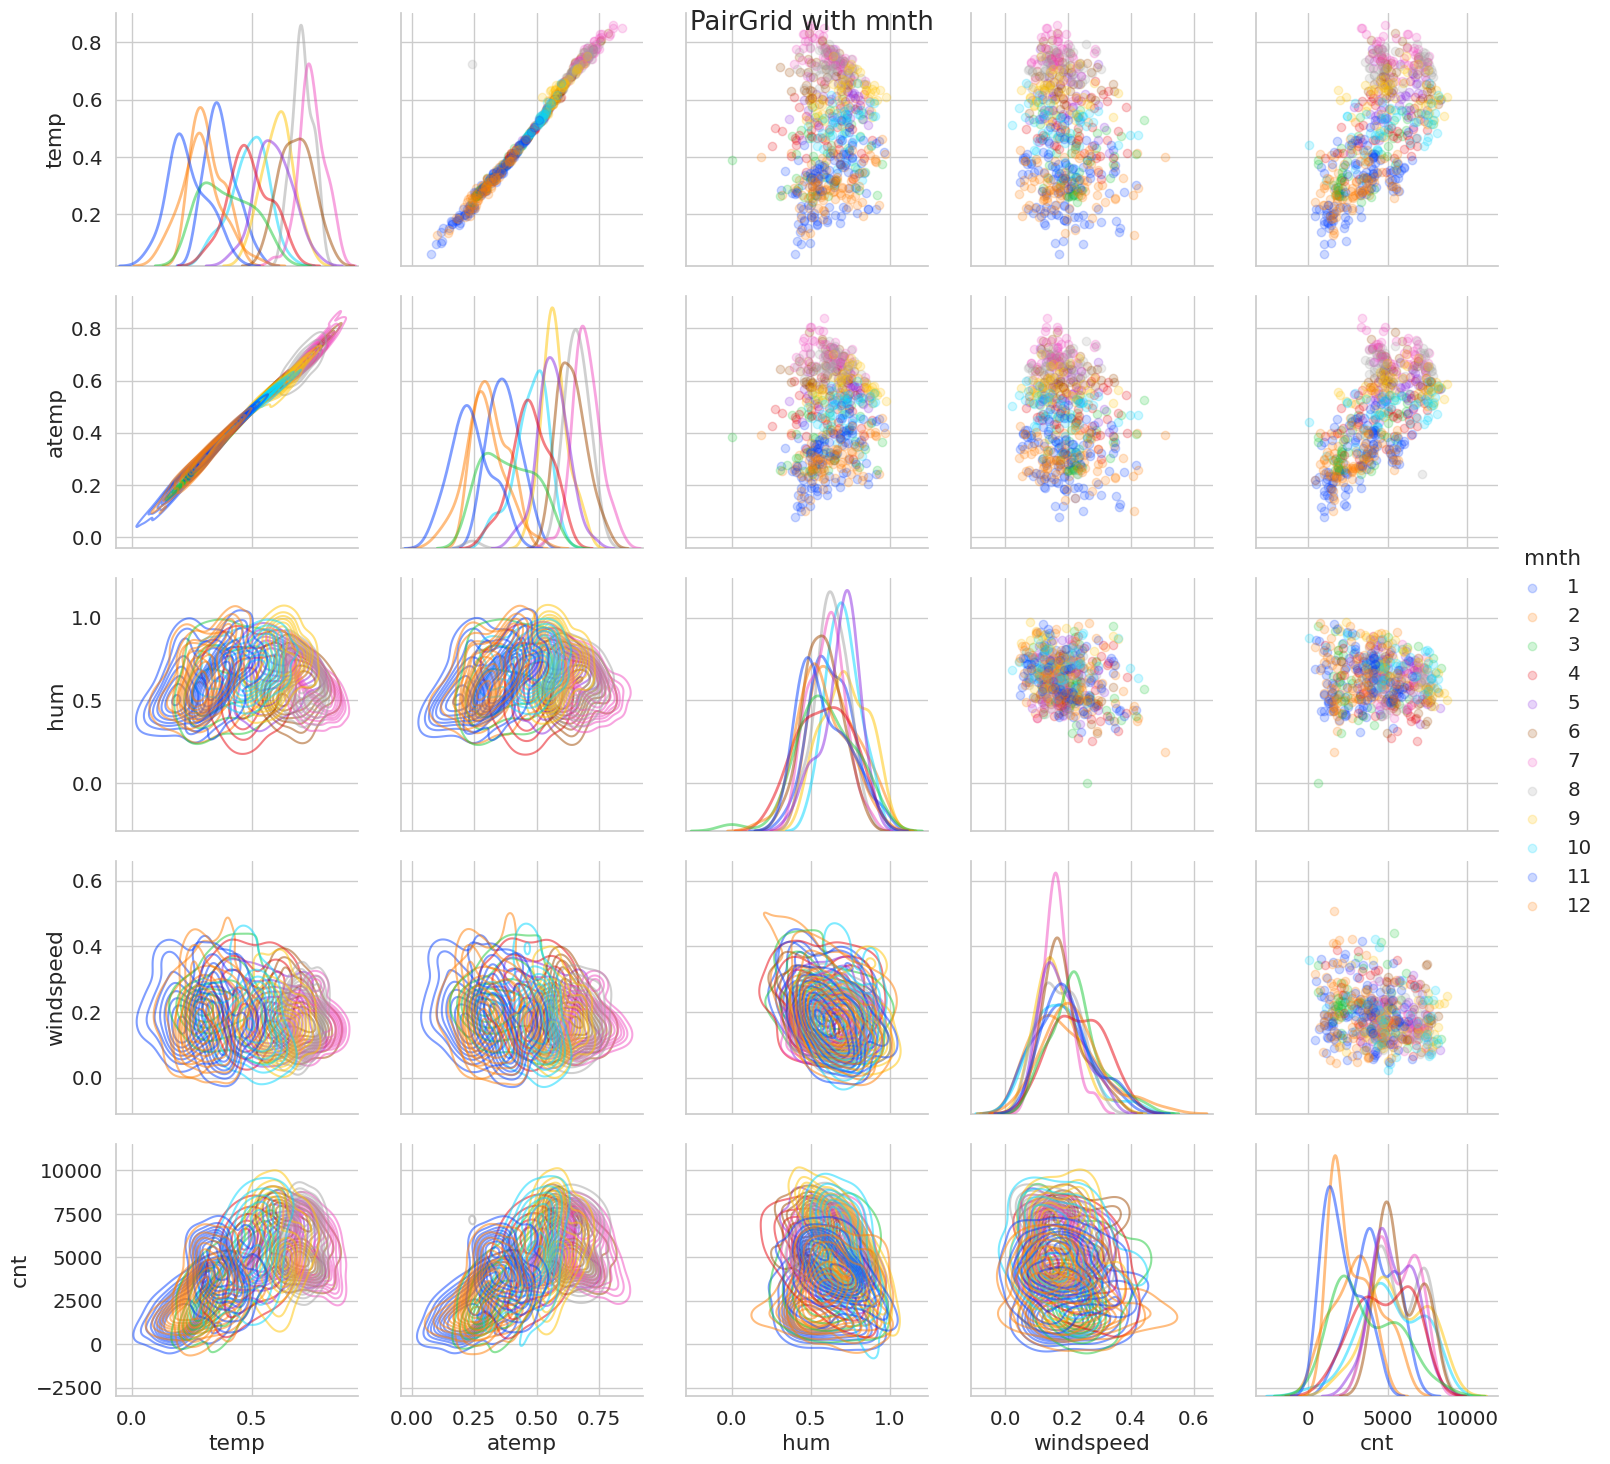

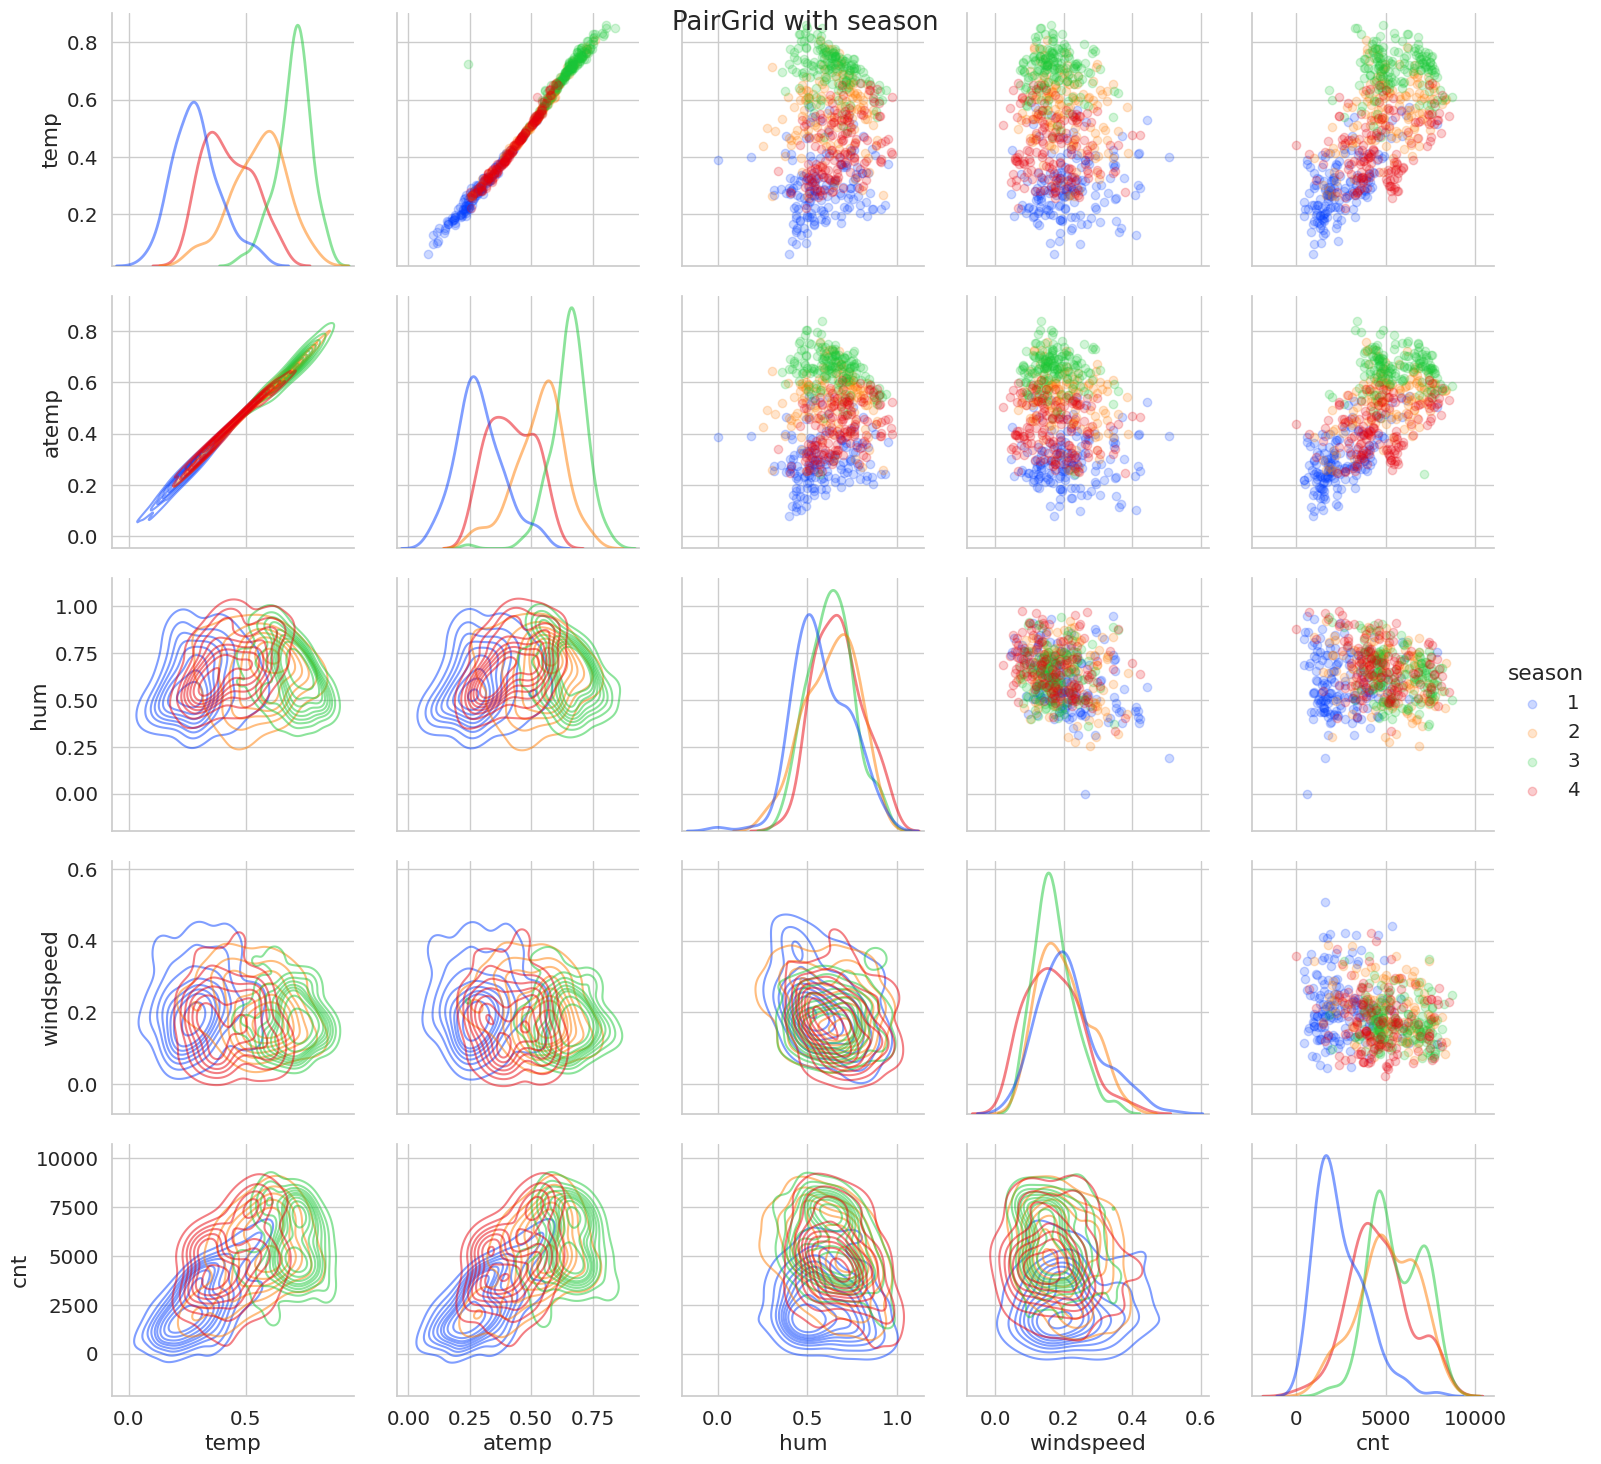

In [9]:
features = ['weathersit', 'mnth', 'season']
for hue in features:
    g = sns.PairGrid(ds_train[num_features + [target, hue]], hue=hue, diag_sharey=False, height=3, palette = 'bright')
    g.map_lower(sns.kdeplot, alpha=0.5)
    g.map_upper(plt.scatter, alpha=0.2)
    g.map_diag(sns.kdeplot, lw=2, alpha=0.5, common_norm=False)
    g.fig.suptitle(f"PairGrid with {hue}")
    g.add_legend()

1)Исходя из зависимостей выше видно, что cnt от temp и atemp линейнозависимы.\
2)Для предсказания таргета в первую очередь надо ориентироваться на зависимости последнего столбца\
Для каждого значения предоставлен scatter, позволяющий увидеть распределение значений категориального признака в зависимости от таргета, а также kdeplot, позволяющий увидеть плотность распределения. \
\
Обратим внимание на

1) В season=1 становится меньше прокатов
2) Количество прокатов увеличивается по выходным
3) В плохую погоду весолипеды берут редко, но стабильно
4) Есть признаки, почти никак не влияющие на ответ: windspeed, hum

Построим графики с наиболее яркими зависимостями

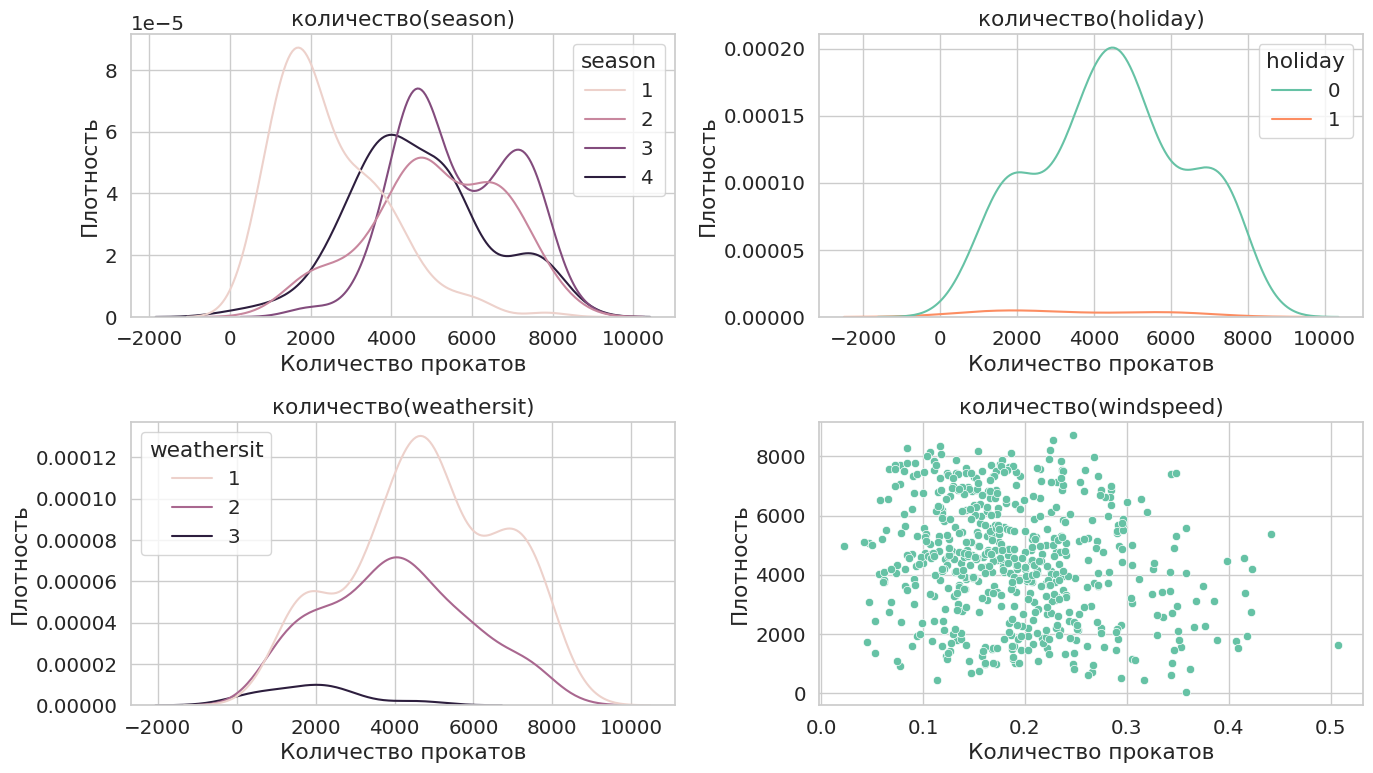

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()
plt_ft = ['season', 'holiday', 'weathersit', 'windspeed']
titles = ['количество(season)', 'количество(holiday)', 'количество(weathersit)', 'количество(windspeed)']
for i in range(len(plt_ft)):
    if i < 3:
        sns.kdeplot(data=ds_train[[plt_ft[i]] + [target]], x=target, hue=plt_ft[i], ax=axes[i])
    else:
        sns.scatterplot(data=ds_train, x=plt_ft[i], y=target, ax=axes[i])
    axes[i].set_title(titles[i]) 
    axes[i].set_ylabel('Плотность')
    axes[i].set_xlabel('Количество прокатов')

plt.tight_layout()
plt.show()

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.

**Выводы по графикам:** \
1)Данные достаточно хорошие, в них незаметно выбросов и неочевидных закономерностей. Я думаю,что это связано с количеством и точностью данных их достаточно много. Распределения гладкие => функции +- гладкие. \
2)Сейчас не имеет смысла добавлять нелинейные функции от признаков, тк достаточно хорошие распределения, по которым можно начинать делать выводы. Если оценка будет очень плохой у модели, то их можно добавить и посмотреть на перфоманс.

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще. *Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

1) уберем выбросы из выборки(нижние 2% и верхние 2%) по каждому критерию, тк мы проверили что таблица полностью заполнена и нет пустых клеток(выше)

In [11]:
data_train = ds_train.copy()
for feature in np.append(num_features, target):
    cr_mn = ds_train[feature].quantile(0.02)
    cr_mx = ds_train[feature].quantile(0.98)
    data_train = data_train[(data_train[feature] >= cr_mn) & (data_train[feature] <= cr_mx)]
data_train

season  mnth  holiday  weekday  workingday  weathersit      temp  \
56        1     2        0        6           0           1  0.282500   
480       2     4        0        3           1           1  0.476667   
43        1     2        0        0           0           1  0.316522   
30        1     1        0        1           1           2  0.180833   
374       1     1        0        2           1           1  0.308696   
..      ...   ...      ...      ...         ...         ...       ...   
558       3     7        0        4           1           1  0.715833   
82        2     3        0        4           1           2  0.285000   
375       1     1        0        3           1           2  0.274167   
472       2     4        0        2           1           1  0.608333   
19        1     1        0        4           1           2  0.261667   

        atemp       hum  windspeed   cnt  
56   0.282192  0.537917   0.186571  1969  
480  0.470317  0.427917   0.118792  6196  
43   0.324113  0.457391   0.260883  1589  
30   0.186250  0.603750   0.187192  1501  
374  0.318826  0.646522   0.187552  3598  
..        ...       ...        ...   ...  
558  0.654683  0.529583   0.146775  7446  
82   0.270833  0.805833   0.243787  1865  
375  0.282821  0.847500   0.131221  2177  
472  0.598487  0.390417   0.273629  6691  
19   0.255050  0.538333   0.195904  1927  

[491 rows x 11 columns]

2) Теперь все числовые признаки стандартизируем, используя StandardScaler, а категориальные преобразуем с помощью OneHotEncoder:

In [12]:
scaler = StandardScaler()
encoder = OneHotEncoder(drop='first', sparse_output=False)

data_train[num_features] = scaler.fit_transform(data_train[num_features])
train_cat = encoder.fit_transform(data_train[cat_features])
train = np.hstack([data_train[num_features], train_cat])
encoder.categories_

[array([1, 2, 3, 4]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1, 2, 3, 4, 5, 6]),
 array([1, 2, 3])]

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [13]:
model = LinearRegression(fit_intercept=True)
model.fit(train, data_train[target])

model.coef_, model.intercept_

(array([1106.46550554,   26.7853657 , -455.76160279, -248.62787459,
         960.70321751,  712.68673435, 1384.80115567,   60.91528954,
         268.529499  ,  145.90465641,  100.66696925, -363.60195409,
        -492.65610924, -283.97994262,  327.63023437,  303.67773205,
        -146.40514384, -154.60196871, -305.94010611,  226.38829113,
         -83.1331402 ,  -67.19904976,  -81.41374621,   61.05571084,
          91.13841036,  248.52680916,  -49.87523052, -975.22074717]),
 3705.8805879561874)

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

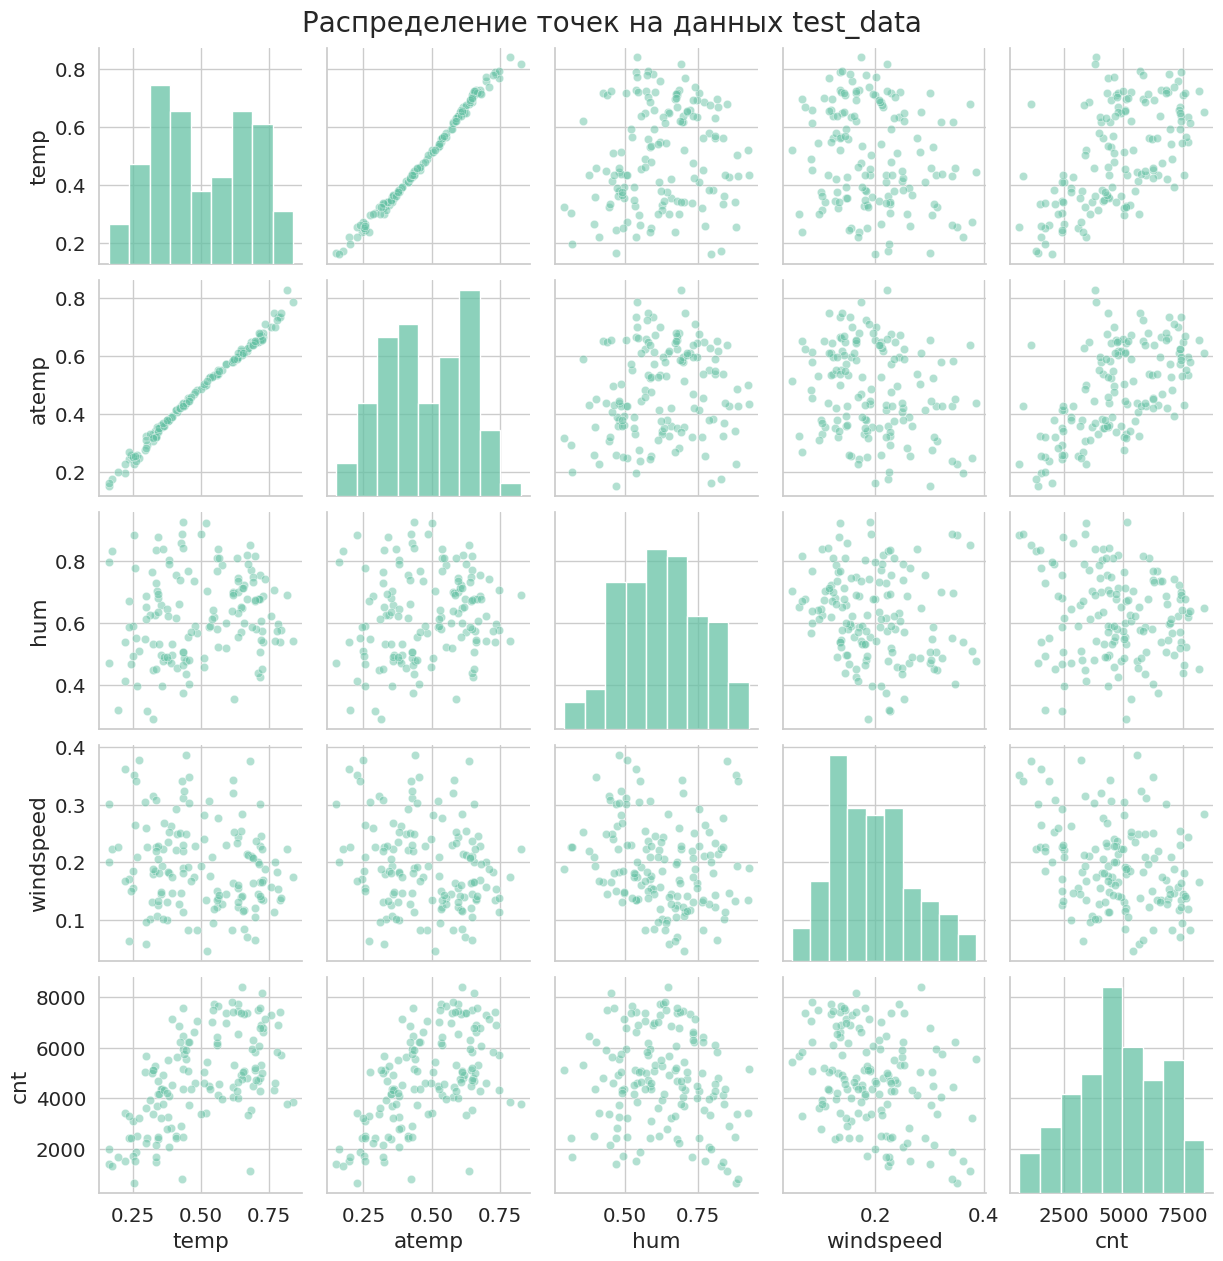

In [14]:
g = sns.pairplot(ds_test[np.append(num_features, 'cnt')], plot_kws={'alpha': 0.5})
g.figure.suptitle("Распределение точек на данных test_data", y=1.012, fontsize=20)
plt.show()

In [15]:
data_test = ds_test.copy()
for feature in np.append(num_features, target):
    cr_mn = ds_train[feature].quantile(0.01)
    cr_mx = ds_train[feature].quantile(0.99)
    data_test = data_test[(data_test[feature] >= cr_mn) & (data_test[feature] <= cr_mx)]

Готовим данные, стандартизируем их с помощью transform и закодируем категориальные признаки

In [16]:
data_test[num_features] = scaler.transform(data_test[num_features])
cat_test = encoder.transform(data_test[cat_features])
test = np.hstack([data_test[num_features], cat_test])

Делаем Predict модели

In [17]:
predict = model.predict(test)
mae = metrics.mean_absolute_error(data_test[target], predict)
mse = metrics.mean_squared_error(data_test[target], predict)
rmse = np.sqrt(mse)
mape = metrics.mean_absolute_percentage_error(data_test[target], predict) * 100

In [18]:
rd = 10 ** 3
print(f'RMSE = {round(rmse * rd) / rd}')
print(f'MAE = {round(mae * rd) / rd}')
print(f'MAPE = {round(mape * rd) / rd}')

RMSE = 1217.611
MAE = 1083.048
MAPE = 28.733


Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

In [19]:
x_t = np.c_[np.ones(train.shape[0]), train]
thetas = np.append(model.coef_, model.intercept_).reshape(-1, 1)
y = data_train[target].values.reshape(-1, 1)
teta = np.linalg.inv(x_t.T @ x_t) @ x_t.T @ y
teta

array([[  1862.57745309],
       [ 11562.29713415],
       [-10247.89125114],
       [   -73.27726125],
       [  -260.52523582],
       [  -234.00848157],
       [ -1529.18590013],
       [   -70.39663272],
       [  -645.54286577],
       [  -907.89684956],
       [   432.43236624],
       [  -216.99846582],
       [   112.7936977 ],
       [  -242.16987825],
       [   202.3093074 ],
       [  1332.89684297],
       [   387.7967535 ],
       [  -646.08232348],
       [  -518.247944  ],
       [-22186.57821555],
       [-24638.03885103],
       [ 10195.00090326],
       [ 21977.65585972],
       [ 24721.37670245],
       [ 24264.93350541],
       [ 21901.69389282],
       [   248.52680916],
       [   -49.87523052],
       [  -975.22074717]])

Посмотрим на матрицу, коэффиценты получились большими, это может быть связано с тем, что у нас несколько зависимых призданков(удалим temp)

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

удалим temp, тк atemp больше отражает запросы клиентов 

Сделайте выводы.

In [20]:
new_train = np.delete(train, 0, axis=1)
new_test = np.delete(test, 0, axis=1)
model = LinearRegression(fit_intercept=True)
model.fit(new_train, data_train[target])

LinearRegression()

In [21]:
predict = model.predict(new_test)
mae = metrics.mean_absolute_error(data_test[target], predict)
mse = metrics.mean_squared_error(data_test[target], predict)
rmse = np.sqrt(mse)
mape = metrics.mean_absolute_percentage_error(data_test[target], predict) * 100

In [22]:
rd = 10 ** 3
print(f'RMSE = {round(rmse * rd) / rd}')
print(f'MAE = {round(mae * rd) / rd}')
print(f'MAPE = {round(mape * rd) / rd}')

RMSE = 1224.988
MAE = 1094.205
MAPE = 29.319


In [23]:
x_t = np.c_[np.ones(train.shape[0]), new_train]
thetas = np.append(model.coef_, model.intercept_).reshape(-1, 1)
y = data_train[target].values.reshape(-1, 1)
teta = np.linalg.inv(x_t.T @ x_t) @ x_t.T @ y
teta

array([[ 1.41176954e+18],
       [ 1.74629942e+17],
       [ 1.41859857e+17],
       [ 6.34119962e+16],
       [-1.09240763e+18],
       [-3.47939425e+16],
       [ 7.41465356e+17],
       [-2.52248403e+17],
       [ 4.32212962e+16],
       [ 1.03026406e+18],
       [ 6.17885468e+17],
       [ 4.81512022e+17],
       [ 2.69622344e+16],
       [-4.78888145e+17],
       [-9.93476291e+16],
       [-7.60869109e+17],
       [-9.90195641e+17],
       [-4.79719946e+17],
       [-8.68029142e+18],
       [-8.23408322e+18],
       [ 5.60993599e+18],
       [ 8.68029142e+18],
       [ 8.23408322e+18],
       [ 8.23408322e+18],
       [ 1.37090706e+19],
       [-4.03808692e+03],
       [-6.50109050e+03],
       [-9.05506221e+03]])

Коэффиценты модели уменьшились, ведь мы избавились от 1 линейнозависимого признака, метрики примерно одинаковые, что говорит о правильном пути, в идеале найти оставшиеся зависимые признаки.

### Вывод: 
В процессе работы я научился работать с простой моделью линейной регрессии, а именно:
* провели полный цикл подготовки данных, обучение модели, анализ результатов
* для линейного приблежения есть два подхода градиентный и аналитический(мнк)
* увидели на практике недостатки методов

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии в матричном виде. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии в матричном виде. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

## Решение 1
$\| Y - X\theta \|^2 = -2X^TY + 2X^TX\theta$\
$\nabla(\lambda \theta^T\theta) = 2\lambda \theta => F(\theta) = \| Y - X\theta \|^2 + \lambda \| \theta \|^2 => \nabla(F(\theta)) = -2X^TY + 2X^TX\theta + 2\lambda \theta\newline=0$\
Значит $\theta = (X^TX + \lambda E)^{-1}X^TY$\
В МНК у нас проблема необратимости матрицы $X^TX$, регуляризация решает эту проблему: если $X^TX$ - матрица Грама, то она положительно полуопределена(как квадрат), $\lambda E(по условию \lambda > 0)$ положительно определена => $+$ этих двух матриц положительно определена. А у положительно определенной матрицы det > 0 -> она обратима -> при любом $\lambda > 0$ у нас проблем с обратимостью не будет.

## Решение 2
В задаче выписаны формулф градиентного спуска, подтавим градиент:\
$\nabla F(\theta) = -2X^TY + 2X^TX\theta + 2\lambda \theta$\
$\theta_{t+1} = \theta_t - \eta * (X^T(X\theta_t - Y) + \lambda\theta_t)$\
В стахостическомспуске берем подмножество из нашей выборки(батч)\
Батч содержит $k$ элементов $I = \{i_1, ..., i_k\}$ исходной выборки, причем $\forall i_j \in U\{1,2,...,n\}$\
Шаг SGD определяется по формуле:\
$\theta_{t+1} = \theta_t - \eta * \frac{n}{k} X_I^T(X_I\theta_t - Y_I) - \eta * \frac{n}{k} \lambda\theta_t$,  где $X_I, Y_I$ - данные с выбранными индексами

## Решение 3
В МНК у нас признаки могут быть разной размерности, тогда определенные коэффиценты большие, другие маленькие. Ridge-регрессия пытается уменьшить коэффиценты, а затем уже идет к точности, а значит данные должны быть стандартизированы\
  Для МНК справедливо:
* Влияние каждой переменной пропорционально её коэффициенту регрессии. Если все переменные выражены в одних и тех же единицах измерений, то они будут сравнимы без стандартизации
* Стандартизация улучшает только точность оценки параметров линейного модельного предиктора, но не влияет на его оптимальность\
Для ridge-регрессии справдливо:

* Нестандартизованные переменные могут привести к неправильному распределению весов между переменными во время процесса регуляризации
* Стандартизация обеспечивает равное влияние каждого признака на результаты, даже если они представлены в разных единицах измерений

---
### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2, используя указанные в ней признаки.

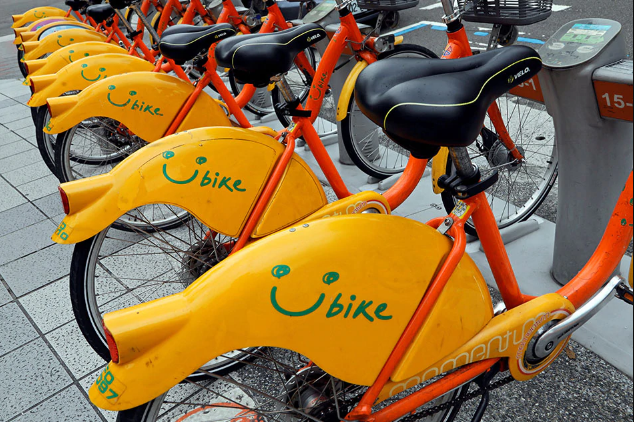

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [24]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.
        
        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''
        
        self.lambd = lambd
        self.fit_intercept = fit_intercept
        
        
    def fit(self, X, Y):
        '''
        Обучение модели ridge-регрессии.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''
        
        # Посчитайте оценки коэффициентов и, возможно, 
        # еще что-то, что пригодится в predict.
        ft = X.copy()
        if self.fit_intercept:
            ft = np.c_[np.ones(ft.shape[0]), ft]
        calc = np.linalg.inv(ft.T @ ft + self.lambd * np.eye(ft.shape[1])) #сделали то что в скобках
        self.thetas = calc @ ft.T @ Y.reshape(-1, 1)  # умножили на исходную матрицу
        if self.fit_intercept:
            self.coeffs = self.thetas[1:]
            self.intercept = self.thetas[0]
        else:
            self.coeffs = self.thetas
            self.intercept = None
        return self
    
    
    def predict(self, X):
        '''
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''
        predictions = X @ self.coeffs
        if self.fit_intercept:
            predictions += self.intercept
        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/lecture3_3.pdf">презентации</a> с занятия. Далее в данной задаче можно копировать код из предыдущих задач или использовать готовые инструменты.

In [25]:
train_data, temp_data = train_test_split(data, test_size=0.4, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)
print("size train:", train_data.shape)
print("size val:", val_data.shape)
print("size test:", test_data.shape)

size train: (438, 11)
size val: (146, 11)
size test: (147, 11)


Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее во второй задаче.

сначала надо удалить признак temp и по аналогии с задачей 2 выкинем нижние и верхние точки

In [26]:
def prepare_data(data):
    features = data.drop(columns=["temp"])
    return features
num_features = ['hum', 'windspeed', 'atemp']
data_train = train_data.copy()
val = val_data.copy()
data_test = test_data.copy()
for feature in np.append(num_features, target):
    curr_tr = data_train[feature].quantile([0.01, 0.99])
    data_train = data_train[(data_train[feature] >= curr_tr.iloc[0]) & (data_train[feature] <= curr_tr.iloc[1])]
    
    curr_vl = val[feature].quantile([0.01, 0.99])
    val = val[(val[feature] >= curr_vl.iloc[0]) & (val[feature] <= curr_vl.iloc[1])]
    
    curr_tst = data_test[feature].quantile([0.01, 0.99])
    data_test = data_test[(data_test[feature] >= curr_tst.iloc[0]) & (data_test[feature] <= curr_tr.iloc[1])]

train = prepare_data(data_train)
val = prepare_data(val)
test = prepare_data(data_test)

In [27]:
val

season  mnth  holiday  weekday  workingday  weathersit     atemp  \
164       2     6        0        2           1           1  0.591546   
448       2     3        0        6           0           2  0.486733   
404       1     2        0        4           1           1  0.261988   
70        1     3        0        6           0           1  0.325750   
464       2     4        0        1           1           1  0.476638   
..      ...   ...      ...      ...         ...         ...       ...   
606       3     8        0        3           1           1  0.635733   
689       4    11        0        2           1           2  0.380667   
360       1    12        0        2           1           2  0.327633   
324       4    11        0        1           1           3  0.445062   
527       2     6        0        1           1           2  0.659721   

          hum  windspeed   cnt  
164  0.507083   0.269283  4891  
448  0.885417   0.192783  3372  
404  0.562083   0.194037  3830  
70   0.594583   0.220775  2132  
464  0.317500   0.358196  5585  
..        ...        ...   ...  
606  0.552083   0.112562  7697  
689  0.685000   0.082725  5634  
360  0.762500   0.188450  1162  
324  0.910000   0.138054  2765  
527  0.587917   0.207713  6664  

[130 rows x 10 columns]

In [28]:
scaler = StandardScaler()
encoder = OneHotEncoder(drop='first', sparse_output=False)
train[num_features] = scaler.fit_transform(train[num_features])
train_cat = encoder.fit_transform(train[cat_features])
x_train = np.hstack([train[num_features], train_cat])
y_train = train[target].values
len(y_train)

398

In [29]:
val[num_features] = scaler.transform(val[num_features])
val_cat = encoder.transform(val[cat_features])

x_val = np.hstack([val[num_features], val_cat])
y_val = val[target].values

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

In [30]:
rmse_train, rmse_val = [], []
mae_train, mae_val = [], []
mape_train, mape_val = [], []
sz1 = -4.5
sz2 = 3
sz3 = 60
for lambd in np.logspace(sz1, sz2, sz3):
    model = RidgeRegression(lambd)
    model.fit(x_train, y_train)
    train_predictions = model.predict(x_train)
    rmse_train.append(np.sqrt(metrics.mean_squared_error(y_train, train_predictions)))
    mae_train.append(metrics.mean_absolute_error(y_train, train_predictions))
    mape_train.append(np.mean(np.abs((y_train - train_predictions) / y_train)) * 100)
    val_predictions = model.predict(x_val)
    rmse_val.append(np.sqrt(metrics.mean_squared_error(y_val, val_predictions)))
    mae_val.append(metrics.mean_absolute_error(y_val, val_predictions))
    mape_val.append(np.mean(np.abs((y_val - val_predictions) / y_val)) * 100)

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

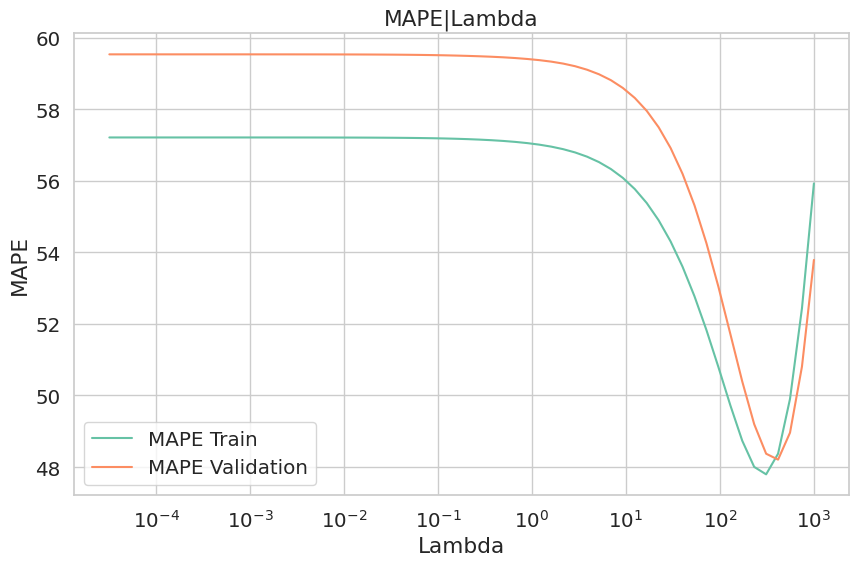

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(np.logspace(sz1, sz2, sz3), mape_train, label='MAPE Train')
plt.plot(np.logspace(sz1, sz2, sz3), mape_val, label='MAPE Validation')
plt.xlabel('Lambda')
plt.ylabel('MAPE')
plt.xscale('log')
plt.title('MAPE|Lambda')
plt.legend()
plt.show()

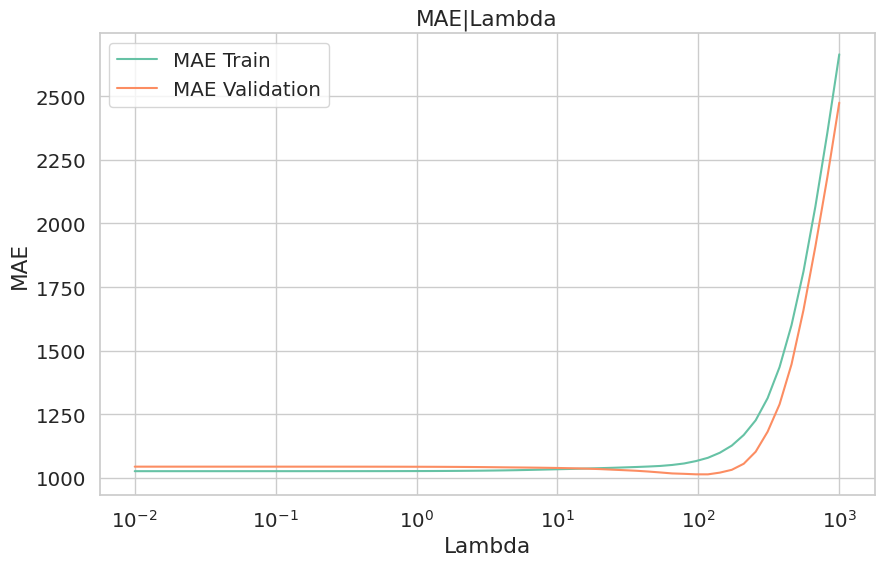

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(np.logspace(-2, sz2, sz3), mae_train, label='MAE Train')
plt.plot(np.logspace(-2, sz2, sz3), mae_val, label='MAE Validation')
plt.xlabel('Lambda')
plt.ylabel('MAE')
plt.xscale('log')
plt.title('MAE|Lambda')
plt.legend()
plt.show()

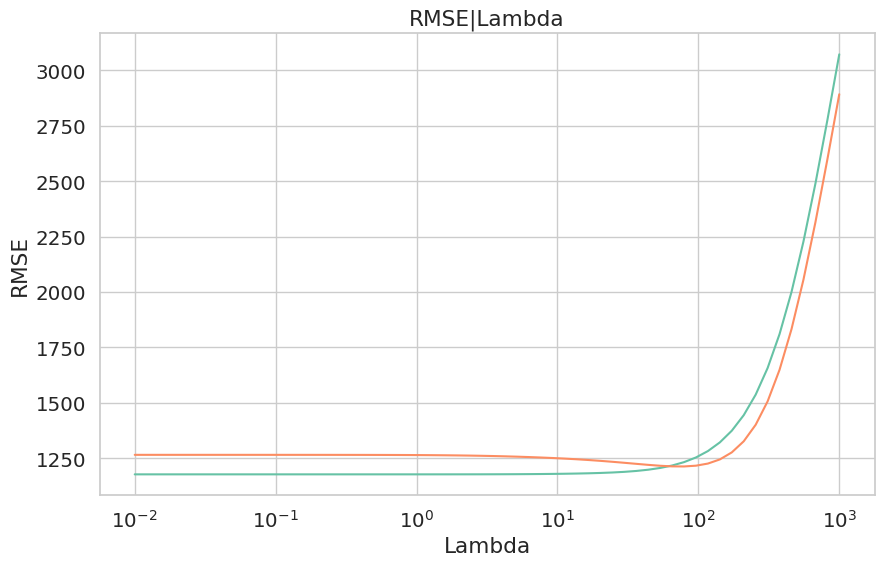

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(np.logspace(-2, sz2, sz3), rmse_train, label='RMSE Train')
plt.plot(np.logspace(-2, sz2, sz3), rmse_val, label='RMSE Validation')
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.xscale('log')
plt.title('RMSE|Lambda')
plt.show()

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

Построим график значения оценок каждого признака от лямбды

In [34]:
lambda_values = np.logspace(sz1, -sz1, sz3)
cf = []
for lambd in lambda_values:
    model = RidgeRegression(lambd)
    model.fit(x_train, y_train)
    cf.append(np.append(model.coeffs, model.intercept))

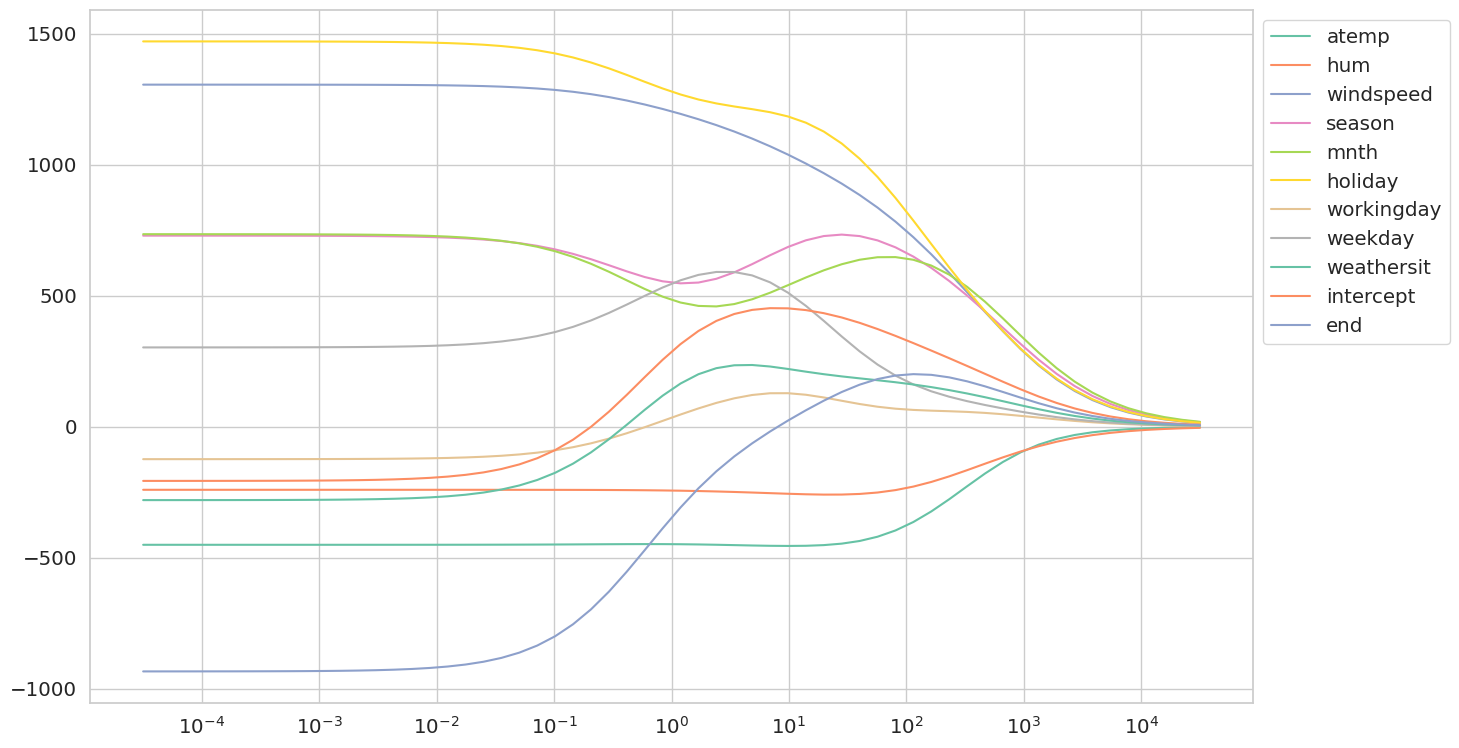

In [36]:
cf = np.array(cf)
             
plt.figure(figsize=(15, 9))
curr_ind = 0
names = ['atemp', 'hum', 'windspeed', 'season', 'mnth', 
         'holiday', 'workingday', 'weekday', 'weathersit', 'intercept', 'end']
curr_label = 'atemp'
for ind in range(cf.shape[1]):
    coef = cf[:, ind]
    plt.plot(lambda_values, cf[:, ind], label=curr_label)
    curr_ind += 1
    if curr_ind == len(names):
        break
    curr_label = names[curr_ind]
plt.xscale('log')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

Выше, там же где мы подготовили оучающие данные были подготовлены тестовые, поэтому сейчас займемся получением метрик на них.

In [37]:
test[num_features] = scaler.transform(test[num_features])
test_cat = encoder.transform(test[cat_features])
x_test = np.hstack([test[num_features], test_cat])
y_test = test[target].values

выбираем оптимальную лямбду по каждой метрике и усредняем

In [38]:
lambda_values = np.logspace(sz1, sz2, sz3)
mape_l = lambda_values[np.array(mape_val).argmin()]
mae_l = lambda_values[np.array(mae_val).argmin()]
rmse_l = lambda_values[np.array(rmse_val).argmin()]
lbd = (mape_l + mae_l + rmse_l) / 3
lbd

159.26427097002082

Получим предикт от модели на основе полученных данных

In [39]:
model = RidgeRegression(lbd)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)

In [40]:
rd = 10 ** 3
print('Метрики на тестовой выборке равны:')
print(f'RMSE = {round(mse ** 0.5 * rd) / rd}')
print(f'MAE = {round(mae * rd)/rd}')
print(f'MAPE = {round(mape * rd) / rd * 100}')

Метрики на тестовой выборке равны:
RMSE = 1620.78
MAE = 1296.72
MAPE = 28.9


### Вывод:
За счет стандартизации данных удалось добиться лучших показателей
1) Модель RidgeRegression улучшила метрики, например MAPE почти на 2% относительно обычной регрессии
2) Зависимые данные по-прежнему влияют на метрики.
3) Возможно имеет смысл посмотреть на другие функции распределения, предложенные в задаче 2.

---
### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

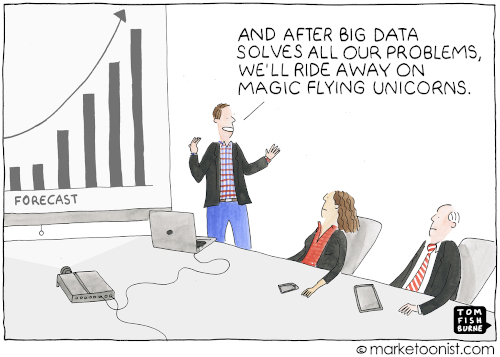

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [41]:
cnt_steps = 500
batch_size = 128
def get_rmse(y_real, y_preds):
    return np.sqrt(metrics.mean_squared_error(y_real, y_preds))
def get_mae(y_real, y_preds):
    return metrics.mean_absolute_error(y_real, y_preds)
def get_mape(y_real, y_preds):
    return metrics.mean_absolute_percentage_error(y_real, y_preds)

In [42]:
def step(n, eta, size, x_i, y_i, theta, l):
    return theta - eta * (n / size) * x_i.T @ (x_i @ theta - y_i) - eta * (n / size) * l * theta
def sdg(x, y, eta=0.0005, steps=cnt_steps, bch_sz = batch_size, l=lbd, metric=get_rmse):
    theta = np.zeros(x.shape[1]).reshape(-1, 1)
    y1 = y.reshape(-1, 1)
    n = x.shape[0]
    err = []
    for i in range(steps):
        i = np.random.choice(n, size=batch_size, replace=False)
        x_i = x[i]
        y_i = y1[i]
        predictions = x @ theta
        err.append(metric(y, predictions))
        theta = step(n, eta, bch_sz, x_i, y_i, theta, l)
    return theta, err

Реализуйте самостоятельно процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Обратите внимание, что при неудачном выборе величины шага градиентного спуска $\eta$ (learning rate) метод может не сойтись. Пример приводился на лекции.

In [43]:
train_st = np.c_[np.ones(x_train.shape[0]), x_train]
thetas = sdg(train_st, y_train, l=mape_l, metric=get_mape)[0]

In [44]:
val_st = np.c_[np.ones(x_val.shape[0]), x_val]
test_st = np.c_[np.ones(x_test.shape[0]), x_test]
train_errors = []
val_errors = []
func = [get_rmse, get_mae, get_mape]
lamb = [rmse_l, mae_l, mape_l]
for i in range(len(func)):
    train_errors.append(sdg(train_st, y_train, l=lamb[i], metric=func[i])[1])
    val_errors.append(sdg(val_st, y_val, l=lamb[i], metric=func[i])[1])

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

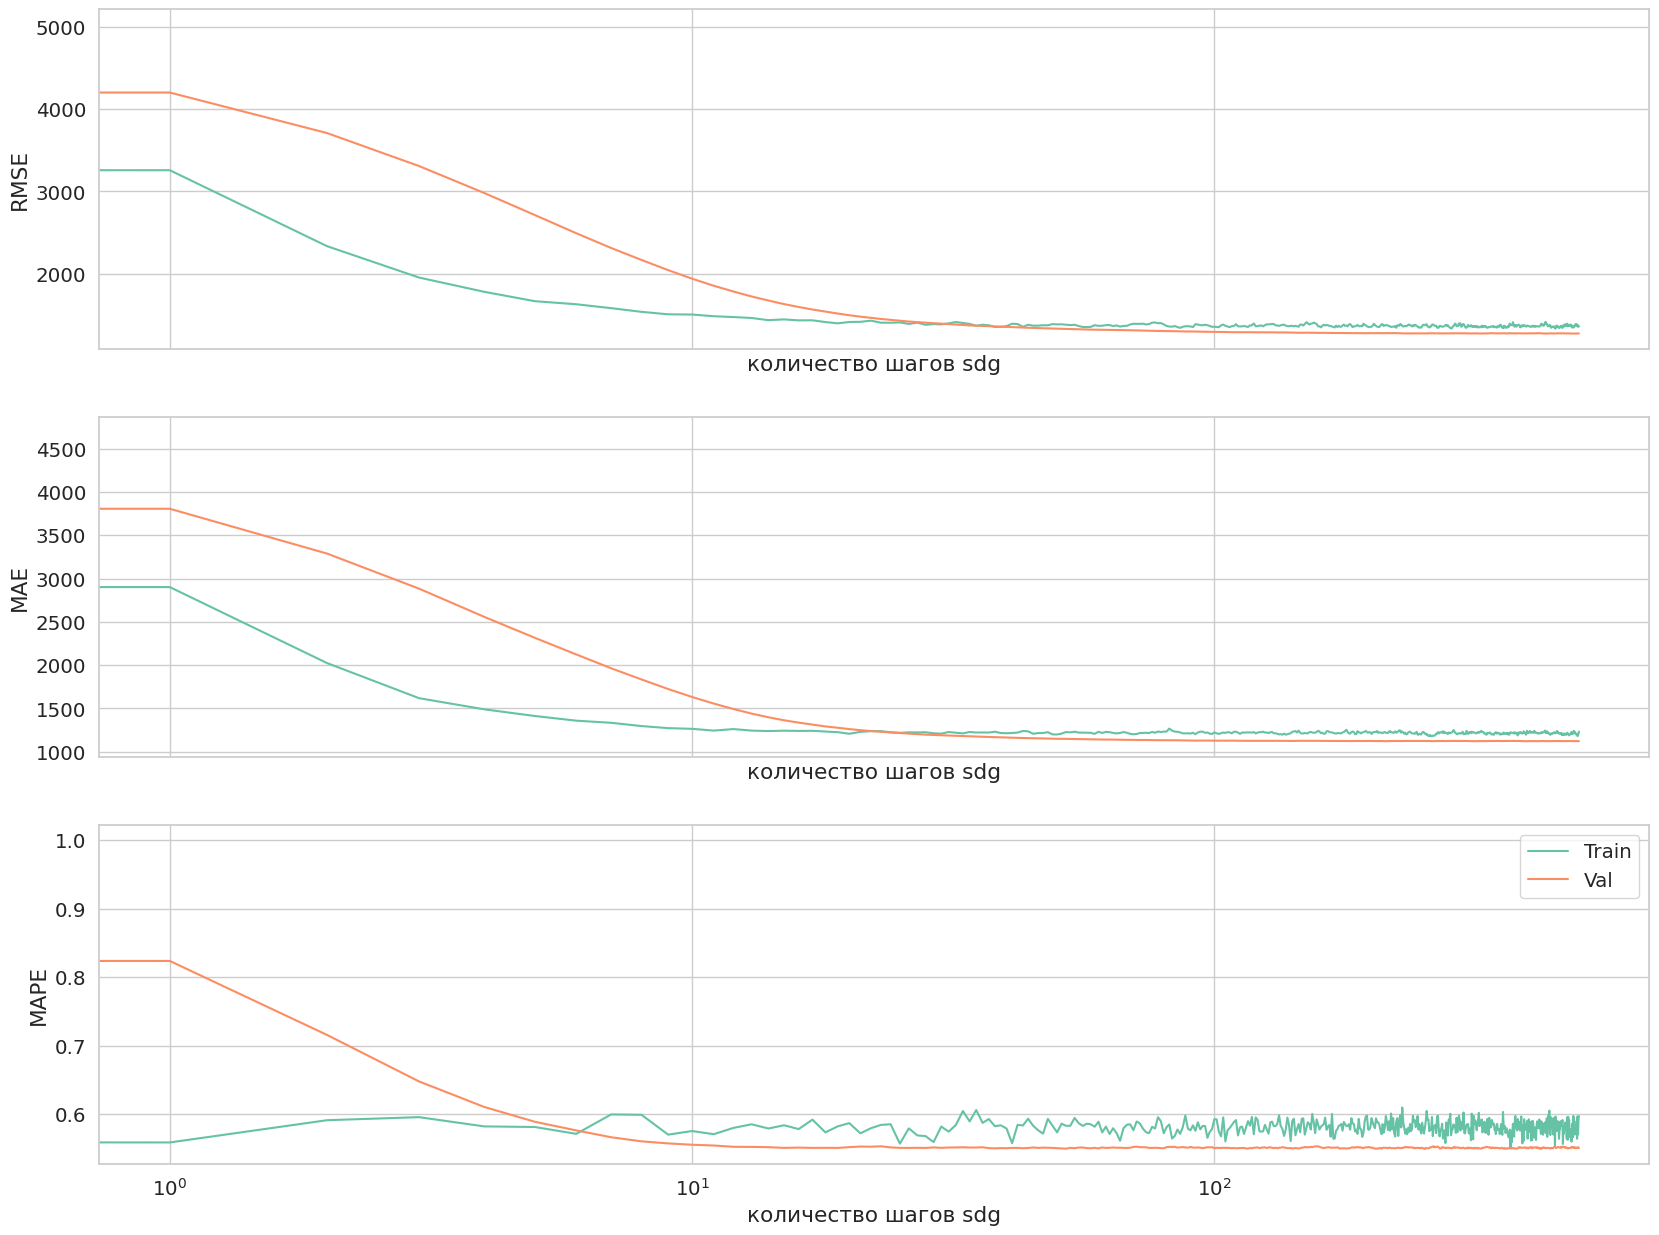

In [45]:
fig, axs = plt.subplots(3, 1, figsize=(20, 15), sharex = True)
name = ['RMSE', 'MAE', 'MAPE']
for i in range(len(name)):
    axs[i].plot(np.arange(cnt_steps), np.array(train_errors[i]).flatten(), label='Train')
    axs[i].plot(np.arange(cnt_steps),np.array(val_errors[i]).flatten(), label='Val')
    axs[i].set_xlabel('количество шагов sdg')
    axs[i].set_xscale('log')
    axs[i].set_ylabel(name[i])
plt.legend()
plt.show()

Посчитайте ошибку на тестовой выборке.

In [46]:
rmse_preds = test_st @ sdg(test_st, y_test, l=rmse_l, metric=get_rmse)[0]
mae_preds = test_st @ sdg(test_st, y_test, l=mae_l, metric=get_mae)[0]
mape_preds = test_st @ sdg(test_st, y_test, l=mape_l, metric=get_mape)[0]

In [47]:
rd = 10 ** 3
metrs = ['mape', 'rmse', 'mae']
print('Результаты метрик на тестовой выборке')
print(f'RMSE = {round(get_rmse(y_test, rmse_preds) * rd) / rd}')
print(f'MAE = {round(get_mae(y_test, mae_preds) * rd) / rd} ')
print(f'MAPE = {round(get_mape(y_test, mape_preds) * rd) / rd * 100}')

Результаты метрик на тестовой выборке
RMSE = 1378.201
MAE = 1223.25 
MAPE = 54.7


### Вывод:
1) Глядя на графики можно сделать вывод, что число итераций для улучшения точности у каждой метрики примерно одинаково и равно 150-200, дальше идут колебания, что говорит, что мы пришли в точку локального минимума и "катаемся в ней".
2) Модель по 2 из 3 метрик показала результаты не уступающие прошлым моделям в точности(а даже лучше), и 3 метрика не так и далека от истинности.
3) Моведение функции значения метрики от количества итераций достаточно гладкое, удобно для анализа.\
Модель реализованная в этой задаче имеет приемущство, ведь она экономит время для вычисления, если у нас большие данные.\
Таким образом на практике было проверено, что модель дает похожую точность предсказания количества аренды велосипедов.